In [89]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from itertools import groupby

In [8]:
data_path = '/home/db600/phd/data/'
#os.getcwd()
os.listdir(data_path)

['depmap', 'pathway_commons', 'string', 'biomart']

In [187]:
reactome = pd.read_csv(data_path + "pathway_commons/PathwayCommons12.reactome.hgnc.txt", sep="\t")
reactome.head()
reactome.columns

Index(['PARTICIPANT_A', 'INTERACTION_TYPE', 'PARTICIPANT_B',
       'INTERACTION_DATA_SOURCE', 'INTERACTION_PUBMED_ID', 'PATHWAY_NAMES',
       'MEDIATOR_IDS'],
      dtype='object')

In [125]:
print(reactome['INTERACTION_TYPE'].unique())

['in-complex-with' 'controls-state-change-of' 'controls-production-of'
 'controls-transport-of' 'controls-transport-of-chemical'
 'catalysis-precedes' 'controls-phosphorylation-of'
 'controls-expression-of' 'chemical-affects' 'used-to-produce'
 'consumption-controlled-by' 'reacts-with' 'PARTICIPANT_TYPE'
 'SmallMoleculeReference' 'ProteinReference'
 'DnaReference;ProteinReference' 'ProteinReference;RnaReference'
 'DnaReference;ProteinReference;RnaReference' 'DnaReference'
 'RnaReference' 'DnaReference;RnaReference']


In [19]:
len(reactome)

365961

365961
365961
731922


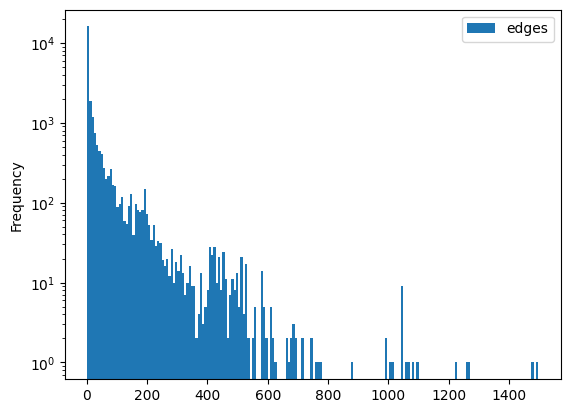

,count
edges,
1,12164
2,948
3,682
4,590
5,543
...,...
96,17
97,20
98,8


In [180]:
total_gene_a = reactome['PARTICIPANT_A'].tolist()
total_gene_b = reactome['PARTICIPANT_B'].tolist()
total_gene = total_gene_a + total_gene_b

total_gene_df = pd.DataFrame(total_gene_all, columns=['gene'])

total_gene_df['edges'] = total_gene_df['gene'].map(total_gene_df['gene'].value_counts())

print(len(total_gene_a))
print(len(total_gene_b))
print(len(total_gene))

total_gene_df.head()

unique_gene_df = total_gene_df.drop_duplicates('gene') 
unique_gene_df.sort_values(by='edges', ascending=False)
frequency = pd.DataFrame(unique_gene_df['edges'].value_counts())
frequency = frequency.sort_values(by='edges', ascending=True)
#fig = frequency.plot(kind='hist', bins=300)
fig = unique_gene_df.plot(kind='hist', bins=200)

plt.yscale('log')
plt.show()

frequency.head(100)

In [92]:
unique_gene_a = reactome['PARTICIPANT_A'].unique().tolist()
unique_gene_b = reactome['PARTICIPANT_B'].unique().tolist()
unique_gene_all = set(unique_gene_a + unique_gene_b)

print(len(unique_gene_a))
print(len(unique_gene_b))
print(len(unique_gene_all))

#df = pd.DataFrame.from_dict(count, orient='index')
#df.plot(kind='bar')

12325
23132
24539


In [175]:
biomart = pd.read_csv(data_path + "biomart/ensg_enst_ensp_hgnc_name.txt")
biomart.head()
print(len(biomart))
gname_reactome_matches = biomart[biomart['Gene name'].isin(unique_gene_all)]
hgnc_reactome_matches = biomart[biomart['HGNC symbol'].isin(unique_gene_all)]

gname_reactome_misses = biomart[~biomart['Gene name'].isin(unique_gene_all)]
hgnc_reactome_misses = biomart[~biomart['HGNC symbol'].isin(unique_gene_all)]

print(len(hgnc_reactome_matches))
print(len(gname_reactome_matches))
print(len(gname_reactome_matches.drop_duplicates('Gene name')))
print(len(hgnc_reactome_matches.drop_duplicates('Gene name')))

gname_reactome_misses = gname_reactome_misses['Gene name'].tolist()
hgnc_reactome_misses = hgnc_reactome_misses['HGNC symbol'].tolist()

total_misses = set(gname_reactome_misses + hgnc_reactome_misses)
print(total_misses)
total_misses_df = pd.DataFrame(total_misses)
total_misses_df.to_csv(data_path + 'missing_gene_names.csv')
#len(biomart[biomart['Gene name'].isnull()])
#len(biomart)

276994
110502
110527
10210
10211
{'RN7SL443P', 'LEF1-AS1', 'CCNYL6', 'TEX14BP', 'RNA5SP468', 'URAHP', 'TEX261', 'CKAP2-DT', 'SNORA78', 'CDK5R2-AS1', 'LRRC47', 'TCERG1P1', 'OR5M6P', 'TBC1D3L', 'TMEM31', 'LINC03083', 'ARHGAP5-AS1', 'MTATP6P19', 'FBXO36-IT1', 'RPL21P113', 'CTAGE16P', 'ZNF630', 'GSTA11P', 'MIR6748', 'LINC00555', 'NUS1P2', 'RPL21P92', 'RNU4-37P', 'RPS3AP10', 'PIFO', 'NKX1-1', 'MIR105-2', 'PDZRN3', 'RBMS1', 'NCOR1P3', 'RPLP1P10', 'MIR133A2', 'CXorf66', 'LINC01399', 'TMEM272', 'ATP6V0E1P3', 'ATP5MGP8', 'CFAP298', 'RNU6-1025P', 'IBA57-DT', 'SLC7A13', 'CCDC9B', 'LLCFC1', 'C1orf127', 'NUP133-DT', 'RN7SL600P', 'IGHV6-1', 'RPL22P5', 'GPRC5D-AS1', 'ZPR1', 'LYPLAL1-AS1', 'FTLP15', 'RPS27AP8', 'MIR4429', 'SNORD11B', 'BTF3L4', 'LINC00251', 'RNU6-208P', 'AGBL4-AS1', 'RPL36AP12', 'SNORA27', 'ATP11A-AS1', 'NARF-AS2', 'LINC01782', 'SAMD4A', 'RNA5SP419', 'RPL8P1', 'FAM32BP', 'HTR3C2P', 'CCDC27', 'RNF148', 'LINC01926', 'SH3TC1', 'SNORD123', 'RPL23AP82', 'TMEM167AP2', 'KRT8P33', 'MRPS10P1', 

In [179]:
from gprofiler import GProfiler

gp = GProfiler(return_dataframe=True)
gp_conv = gp.convert(organism='hsapiens',
            query=list(unique_gene_all),
            target_namespace='ENSG')
            #target_namespace='ENTREZGENE_ACC')
            
gp_conv.head()

,incoming,converted,n_incoming,n_converted,name,description,namespaces,query
0,XIAP,ENSG00000101966,1,1,XIAP,X-linked inhibitor of apoptosis [Source:HGNC S...,"ENTREZGENE,GENECARDS,HGNC,UNIPROT_GN,WIKIGENE",query_1
1,I13R2_HUMAN,None,2,1,None,None,,query_1
2,LRP1,ENSG00000123384,3,1,LRP1,LDL receptor related protein 1 [Source:HGNC Sy...,"ENTREZGENE,GENECARDS,HGNC,UNIPROT_GN,WIKIGENE",query_1
3,DDIT4,ENSG00000168209,4,1,DDIT4,DNA damage inducible transcript 4 [Source:HGNC...,"ENTREZGENE,GENECARDS,HGNC,UNIPROT_GN,WIKIGENE",query_1
4,MTR,ENSG00000116984,5,1,MTR,5-methyltetrahydrofolate-homocysteine methyltr...,"ENTREZGENE,GENECARDS,HGNC,UNIPROT_GN,WIKIGENE",query_1


In [163]:
help(GProfiler)

Help on class GProfiler in module gprofiler.gprofiler:

class GProfiler(builtins.object)
 |  GProfiler(user_agent: str = '', base_url: str = None, return_dataframe: bool = False)
 |  
 |  Methods defined here:
 |  
 |  __getattr__(self, item)
 |  
 |  __init__(self, user_agent: str = '', base_url: str = None, return_dataframe: bool = False)
 |      A class representing the g:Profiler toolkit. Contains methods for
 |      querying the g:GOSt, g:Convert, g:Orth and g:SNPense tools. Please see the
 |      g:Profiler web tool (https://biit.cs.ut.ee/gprofiler/) for extensive documentation on all the options to
 |      the methods.
 |      
 |      :param user_agent: the URL used for the g:Profiler service.
 |      :param base_url: the URL used for the g:Profiler service.
 |      :param return_dataframe: if True, query results are presented as pandas DataFrames.
 |  
 |  convert(self, query: Union[str, List[str], Dict[str, List[str]]], organism: str = 'hsapiens', target_namespace: str = 'ENS

In [188]:
#result = pd.merge(reactome, gp_conv, how="left", on=["PARTICIPANT_A", "incoming"])
result = reactome.merge(gp_conv[['converted','incoming']], left_on ='converted', right_on='PARTICIPANT_A', how='left')

KeyError: 'PARTICIPANT_A'